# Homework 5
### Wing Huang PID: A18894844
**Date:** 2026-02-17

### Problem 1: basic matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#### 1(a)

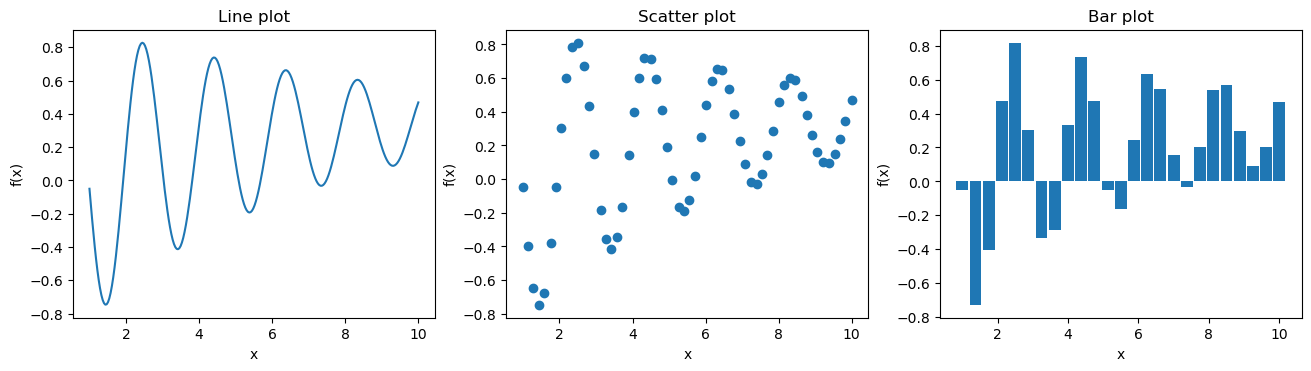

In [2]:
x = np.linspace(1, 10, 250)
f = np.exp(-0.15 * x) * np.sin(3.2 * x) + 0.15 * np.log(x)

fig, ax = plt.subplots(1, 3, figsize=(13, 3.6), constrained_layout=True)

ax[0].plot(x, f)
ax[0].set_title("Line plot")
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")

idx = np.linspace(0, len(x) - 1, 60, dtype=int)
ax[1].scatter(x[idx], f[idx])
ax[1].set_title("Scatter plot")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")

xb = np.linspace(1, 10, 25)
fb = np.exp(-0.15 * xb) * np.sin(3.2 * xb) + 0.15 * np.log(xb)
bar_w = (xb[1] - xb[0]) * 0.9
ax[2].bar(xb, fb, width=bar_w)
ax[2].set_title("Bar plot")
ax[2].set_xlabel("x")
ax[2].set_ylabel("f(x)")

plt.show()

#### 1(b)

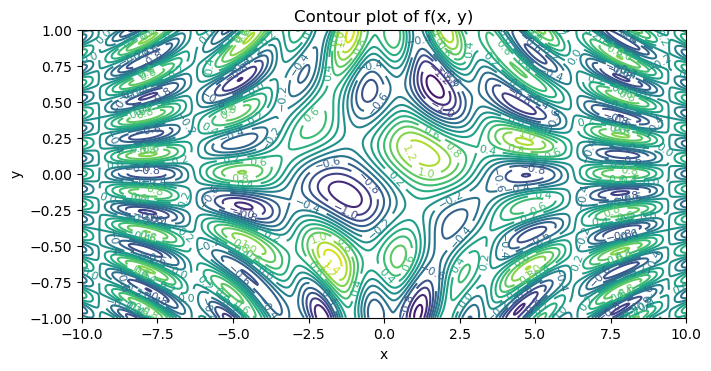

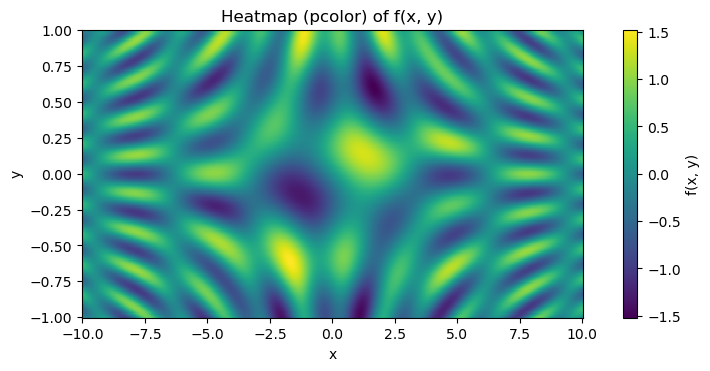

In [3]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-1, 1, 250)
X, Y = np.meshgrid(x, y)

F = np.sin(X) * np.cos(3 * X * Y) + 0.6 * np.exp(-(X / 5) ** 2) * np.sin(8 * Y)

fig, ax = plt.subplots(figsize=(7, 3.6), constrained_layout=True)
cs = ax.contour(X, Y, F, levels=18)
ax.clabel(cs, inline=True, fontsize=8)
ax.set_title("Contour plot of f(x, y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

fig, ax = plt.subplots(figsize=(7, 3.6), constrained_layout=True)
pc = ax.pcolor(X, Y, F, shading="auto")
fig.colorbar(pc, ax=ax, label="f(x, y)")
ax.set_title("Heatmap (pcolor) of f(x, y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

#### 1(c) A 3D plot

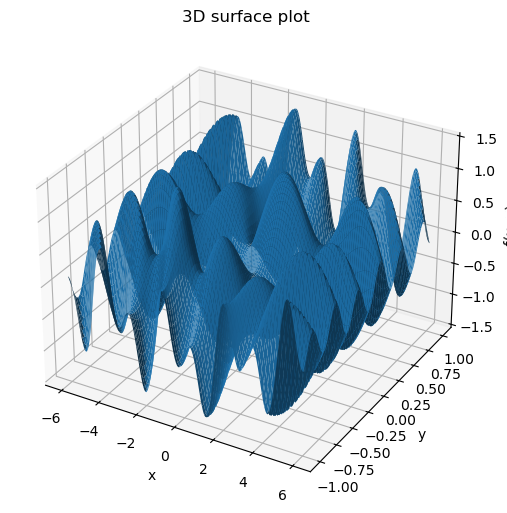

In [5]:
x3 = np.linspace(-6, 6, 220)
y3 = np.linspace(-1, 1, 160)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = np.sin(X3) * np.cos(3 * X3 * Y3) + 0.6 * np.exp(-(X3 / 4) ** 2) * np.sin(8 * Y3)

fig = plt.figure(figsize=(8, 5), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X3, Y3, Z3, rstride=2, cstride=2, linewidth=0)
ax.set_title("3D surface plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()

### Problem 2: Reading Documentation

#### 2(a)

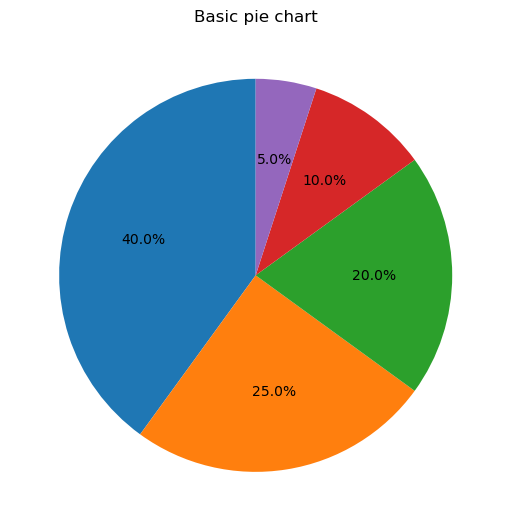

In [6]:
sizes = [40, 25, 20, 10, 5]

fig, ax = plt.subplots(figsize=(5.2, 5.2), constrained_layout=True)
ax.pie(sizes, startangle=90, autopct="%1.1f%%")
ax.set_title("Basic pie chart")
plt.show()

#### 2(b)

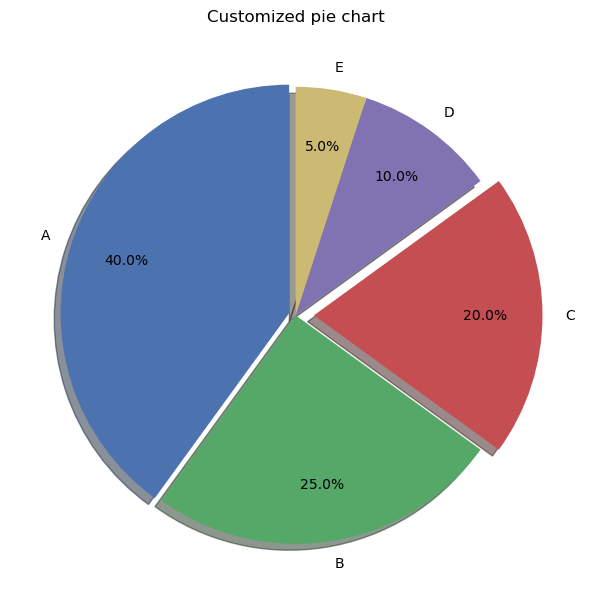

In [7]:
labels = ["A", "B", "C", "D", "E"]
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974"]
explode = [0.03, 0.00, 0.08, 0.00, 0.00]

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    startangle=90,
    autopct="%1.1f%%",
    pctdistance=0.75,
    shadow=True,
    wedgeprops={"linewidth": 1.0},
)
ax.set_title("Customized pie chart")
plt.show()

#### 2(c)

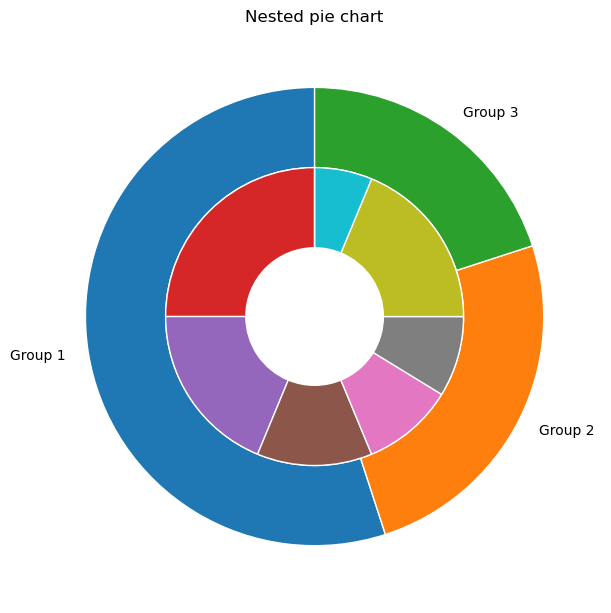

In [8]:
outer = np.array([55, 25, 20])
inner = np.array([20, 15, 10, 8, 7, 15, 5, 0])

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

ax.pie(
    outer,
    radius=1.0,
    labels=["Group 1", "Group 2", "Group 3"],
    wedgeprops={"width": 0.35, "edgecolor": "white"},
    startangle=90,
)

ax.pie(
    inner,
    radius=0.65,
    labels=None,
    wedgeprops={"width": 0.35, "edgecolor": "white"},
    startangle=90,
)

ax.set(aspect="equal")
ax.set_title("Nested pie chart")
plt.show()

#### 2(d)

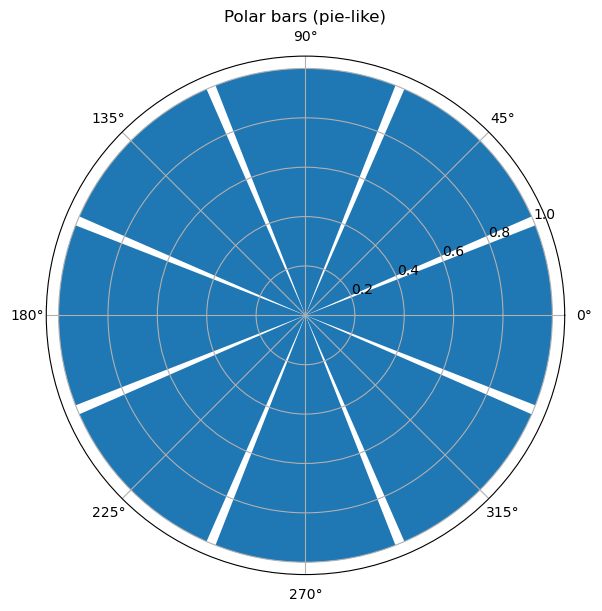

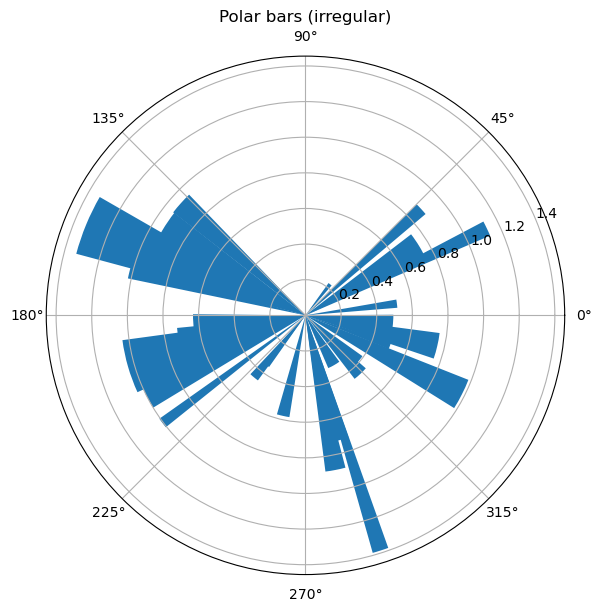

In [9]:
n = 8
theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
r = np.ones(n)
width = (2 * np.pi / n) * 0.95

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6, 6), constrained_layout=True)
ax.bar(theta, r, width=width, bottom=0.0)
ax.set_title("Polar bars (pie-like)")
plt.show()

n2 = 30
theta2 = np.sort(np.random.rand(n2) * 2 * np.pi)
r2 = 0.2 + 1.2 * np.random.rand(n2)
width2 = 0.05 + 0.25 * np.random.rand(n2)

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6, 6), constrained_layout=True)
ax.bar(theta2, r2, width=width2, bottom=0.0)
ax.set_title("Polar bars (irregular)")
plt.show()

## Problem 3: Extrema

In [13]:
def newton_extremum(fp, fpp, x0, tol=1e-10, max_iter=50):
    x = float(x0)
    for k in range(1, max_iter + 1):
        denom = fpp(x)
        if denom == 0:
            raise ZeroDivisionError("Newton step undefined")
        x_new = x - fp(x) / denom
        if abs(x_new - x) < tol:
            return x_new, k
        x = x_new
    return x, max_iter

f1p = lambda x: 2 * (x - 2)
f1pp = lambda x: 2 + 0 * x
x_star_1, it1 = newton_extremum(f1p, f1pp, x0=10)
print("Example 1 critical point:", x_star_1, "iters:", it1, "f''>", f1pp(x_star_1))

f2p = lambda x: 3 * x**2 - 3
f2pp = lambda x: 6 * x
x_star_2a, it2a = newton_extremum(f2p, f2pp, x0=2.5)
x_star_2b, it2b = newton_extremum(f2p, f2pp, x0=-2.5)
print("Example 2 critical point from x0=2.5:", x_star_2a, "f''=", f2pp(x_star_2a))
print("Example 2 critical point from x0=-2.5:", x_star_2b, "f''=", f2pp(x_star_2b))

Example 1 critical point: 2.0 iters: 2 f''> 2.0
Example 2 critical point from x0=2.5: 1.0 f''= 6.0
Example 2 critical point from x0=-2.5: -1.0 f''= -6.0


#### 3(b)

In [14]:
def find_local_minimum(fp, fpp, x0_list, tol=1e-10, max_iter=50):
    last = None
    for x0 in x0_list:
        try:
            x_star, iters = newton_extremum(fp, fpp, x0, tol=tol, max_iter=max_iter)
        except ZeroDivisionError:
            continue
        last = (x_star, iters)
        if fpp(x_star) > 0:
            return x_star, iters
    if last is None:
        raise RuntimeError("No convergent Newton")
    raise RuntimeError("Converged, but no local minimum")

x_min, it_min = find_local_minimum(f2p, f2pp, x0_list=[-3, -1.5, -0.5, 0.5, 2.0, 4.0])
print("Local minimum for x^3-3x:", x_min, "iters:", it_min)

fp3 = lambda x: -np.sin(x) + 0.2 * x
fpp3 = lambda x: -np.cos(x) + 0.2
x_min2, it_min2 = find_local_minimum(fp3, fpp3, x0_list=np.linspace(-10, 10, 21))
print("A local minimum for cos(x)+0.1x^2:", x_min2, "iters:", it_min2)

Local minimum for x^3-3x: 1.0 iters: 6
A local minimum for cos(x)+0.1x^2: 2.595739079649799 iters: 47


#### 3(c)

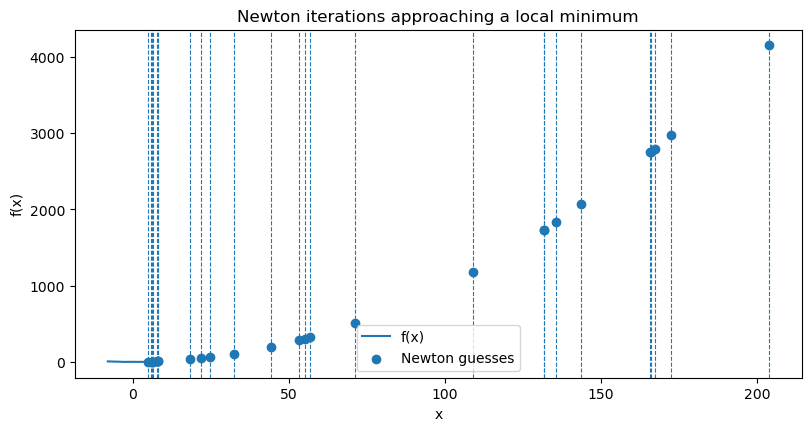

6.0
[  6.           7.94616328   5.91405905   8.02096869   6.33313872
   7.85638274   5.03387132  21.89587548  18.31229399  24.64541608
  32.54102416  56.79968224  71.25540535  53.11732456  44.19250691
  55.2850245  172.63385403 143.70481009 203.7599476  167.20993815
 131.74598198 165.78784754 131.72236279 166.00697802 135.67336177
 108.89128084]
0.6849747452132318


In [15]:
def newton_path(fp, fpp, x0, tol=1e-10, max_iter=25):

    xs = [float(x0)]
    x = float(x0)
    for _ in range(max_iter):
        denom = fpp(x)
        if denom == 0:
            break
        x_new = x - fp(x) / denom
        xs.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return np.array(xs)

f3 = lambda x: np.cos(x) + 0.1 * x**2
fp3 = lambda x: -np.sin(x) + 0.2 * x
fpp3 = lambda x: -np.cos(x) + 0.2

x0 = 6.0
path = newton_path(fp3, fpp3, x0)

xx = np.linspace(-8, 8, 800)

fig, ax = plt.subplots(figsize=(8, 4.2), constrained_layout=True)
ax.plot(xx, f3(xx), label="f(x)")
ax.scatter(path, f3(path), label="Newton guesses")

for xk in path:
    ax.axvline(xk, linestyle="--", linewidth=0.8)

ax.set_title("Newton iterations approaching a local minimum")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
plt.show()

print(x0)
print(path)
print(fpp3(path[-1]))